from: https://www.linkedin.com/learning/python-statistics-essential-training/welcome?u=2106537

we can exexcute from the OS by prepending our code with excalamtion point

In [2]:
!unzip Ex_Files_Python_Statistics_EssT.zip 

Archive:  Ex_Files_Python_Statistics_EssT.zip
replace Ex_Files_Python_Statistics_EssT/Exercise Files/chapter2/02_06/02_06_solution_begin.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


- keep observations in rows and features in columns
- keep a dictionary for the code book overall data
## Cleaning Data

- might be easier to clean in spreadsheet
    - if this is true, keep different sheets for progress over time such that the original data is maintained and at each step
    - save as csv
- keep consistent codes for categorical data and missing data
- be format in naming files
- consistent date format
    - easy to keep as a string
- consistent variable names
- consistent file organization

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline 
# what does this do??

In [5]:
planets = pd.read_csv("Ex_Files_Python_Statistics_EssT/Exercise Files/Planets.csv", usecols = [0,1,2,3])

In [6]:
planets

,Planet,Mass,Diameter,DayLength
0,MERCURY,0.3300,4879,4222.6
1,VENUS,4.8700,"12,104",2802.0
2,EARTH,5.9700,"12,756",24.0
3,MOON,0.0730,3475,708.7
4,MARS,0.6420,6792,24.7
5,JUPITER,1898.0000,"142,984",9.9
6,SATURN,568.0000,"120,536",10.7
7,URANUS,86.8000,"51,118",17.2
8,NEPTUNE,102.0000,"49,528",16.1
9,PLUTO,0.0146,2370,153.3


In [7]:
planets.Mass

0       0.3300
1       4.8700
2       5.9700
3       0.0730
4       0.6420
5    1898.0000
6     568.0000
7      86.8000
8     102.0000
9       0.0146
Name: Mass, dtype: float64

In [8]:
planets['Mass']

0       0.3300
1       4.8700
2       5.9700
3       0.0730
4       0.6420
5    1898.0000
6     568.0000
7      86.8000
8     102.0000
9       0.0146
Name: Mass, dtype: float64

In [9]:
planets.index

RangeIndex(start=0, stop=10, step=1)

In [10]:
planets.loc[0]

Planet       MERCURY
Mass            0.33
Diameter        4879
DayLength     4222.6
Name: 0, dtype: object

In [11]:
planets.set_index('Planet', inplace=True)

In [12]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, MERCURY to PLUTO
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mass       10 non-null     float64
 1   Diameter   10 non-null     object 
 2   DayLength  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes


In [13]:
len(planets) # number of rows

10

In [14]:
planets.loc['MERCURY']

Mass           0.33
Diameter       4879
DayLength    4222.6
Name: MERCURY, dtype: object

In [15]:
planets.loc['MERCURY':'EARTH']

,Mass,Diameter,DayLength
Planet,,,
MERCURY,0.33,4879,4222.6
VENUS,4.87,"12,104",2802.0
EARTH,5.97,"12,756",24.0


In [16]:
planets.columns

Index(['Mass', 'Diameter', 'DayLength'], dtype='object')

In [17]:
planets = pd.read_csv("Ex_Files_Python_Statistics_EssT/Exercise Files/Planets.csv")

In [18]:
planets.set_index('Planet', inplace=True)
planets

,Mass,Diameter,DayLength,SunDistance,OrbitPeriod,OrbitVelocity,MeanTemperature,SurfacePressure,Moons,Rings,MagneticField,FirstVisited,FirstMission
Planet,,,,,,,,,,,,,
MERCURY,0.3300,4879,4222.6,57.9,88,47.4,167,0.00000,0,No,Yes,1974-03-29,Mariner 10
VENUS,4.8700,"12,104",2802.0,108.2,224.7,35.0,464,92.00000,0,No,No,1962-08-27,Mariner 2
EARTH,5.9700,"12,756",24.0,149.6,365.2,29.8,15,1.00000,1,No,Yes,NaN,NaN
MOON,0.0730,3475,708.7,NaN,27.3,1.0,-20,0.00000,0,No,No,1959-09-12,Luna 2
MARS,0.6420,6792,24.7,227.9,687,24.1,-65,0.01000,2,No,No,1965-07-15,Mariner 4
JUPITER,1898.0000,"142,984",9.9,778.6,4331,13.1,-110,NaN,67,Yes,Yes,1973-12-04,Pioneer 10
SATURN,568.0000,"120,536",10.7,1433.5,"10,747",9.7,-140,NaN,62,Yes,Yes,1979-09-01,Pioneer 11
URANUS,86.8000,"51,118",17.2,2872.5,"30,589",6.8,-195,NaN,27,Yes,Yes,1986-01-24,Voyager 2
NEPTUNE,102.0000,"49,528",16.1,4495.1,"59,800",5.4,-200,NaN,14,Yes,Yes,1989-08-25,Voyager 2



### 3 Ways to Subset
- column object, subset row
- row object, subset column
- data frame object, subset row, column

In [19]:
# Subset by column, then row
planets.FirstVisited['MERCURY']
# Subset by row, then colunmn
planets.loc['MERCURY'].FirstVisited
# Subset both, row major
planets.loc['MERCURY', 'FirstVisited']

'1974-03-29'

In [20]:
type(planets.loc['MERCURY', 'FirstVisited'])

str

### Dates in Pandas
- convert strings to dates
- access date objects with .dt and subset year, month, etc
- math on dates

In [21]:
pd.to_datetime(planets.FirstVisited)

Planet
MERCURY   1974-03-29
VENUS     1962-08-27
EARTH            NaT
MOON      1959-09-12
MARS      1965-07-15
JUPITER   1973-12-04
SATURN    1979-09-01
URANUS    1986-01-24
NEPTUNE   1989-08-25
PLUTO     2015-07-14
Name: FirstVisited, dtype: datetime64[ns]

In [22]:
planets.FirstVisited = pd.to_datetime(planets.FirstVisited)

In [23]:
# access date object
planets.FirstVisited.dt.year

Planet
MERCURY    1974.0
VENUS      1962.0
EARTH         NaN
MOON       1959.0
MARS       1965.0
JUPITER    1973.0
SATURN     1979.0
URANUS     1986.0
NEPTUNE    1989.0
PLUTO      2015.0
Name: FirstVisited, dtype: float64

In [24]:
# math on dates
2018 - planets.FirstVisited.dt.year

Planet
MERCURY    44.0
VENUS      56.0
EARTH       NaN
MOON       59.0
MARS       53.0
JUPITER    45.0
SATURN     39.0
URANUS     32.0
NEPTUNE    29.0
PLUTO       3.0
Name: FirstVisited, dtype: float64

# Tidy Data in Python
## Cleaning Fundamentals
- use billboard.csv

In [25]:
billboard = pd.read_csv('Ex_Files_Python_Statistics_EssT/Exercise Files/chapter2/02_04/billboard.csv')
billboard

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
billboard.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

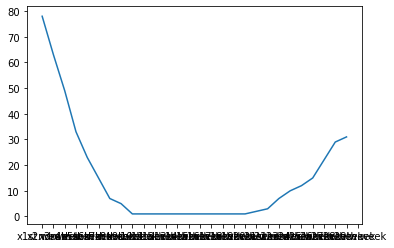

In [28]:
pp.plot(billboard.loc[0, 'x1st.week':'x76th.week'])

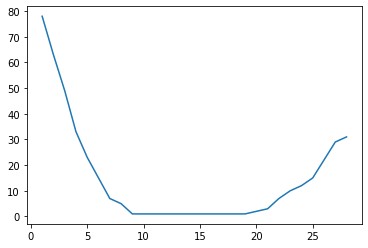

In [29]:
pp.plot(range(1,77),billboard.loc[0, 'x1st.week':'x76th.week'])

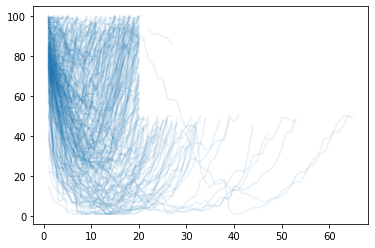

In [30]:
for index, row in billboard.iterrows():
    pp.plot(range(1,77), row['x1st.week':'x76th.week'], color = 'C0', alpha = 0.1)

In [31]:
bshort = billboard[['artist.inverted', 'track', 'time', 'date.entered', 'x1st.week', 'x2nd.week', 'x3rd.week']]
bshort

,artist.inverted,track,time,date.entered,x1st.week,x2nd.week,x3rd.week
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0
...,...,...,...,...,...,...,...
312,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,98,NaN,NaN
313,"Smith, Will",Freakin' It,3:58,2000-02-12,99,99.0,99.0
314,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN
315,"Eastsidaz, The",Got Beef,3:58,2000-07-01,99,99.0,NaN


- change the column names to be more concise

In [32]:
bshort.columns = ('artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3')
bshort.head()

,artist,track,time,date.entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


- melt the data so the weeks are observations within week and rank rows (rather than separated)

In [33]:
# Melt the data

bmelt = bshort.melt(['artist', 'track', 'time', 'date.entered'],['wk1', 'wk2','wk3'], 'week', 'rank')
bmelt

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,wk1,57.0
...,...,...,...,...,...,...
946,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,wk3,NaN
947,"Smith, Will",Freakin' It,3:58,2000-02-12,wk3,99.0
948,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk3,NaN
949,"Eastsidaz, The",Got Beef,3:58,2000-07-01,wk3,NaN


- query a string (like a pandas nlt method) to lookup a specific song within the DF

In [34]:
bmelt.query('track == "Liar"')

,artist,track,time,date.entered,week,rank
66,Profyle,Liar,3:57,2000-09-16,wk1,52.0
383,Profyle,Liar,3:57,2000-09-16,wk2,32.0
700,Profyle,Liar,3:57,2000-09-16,wk3,25.0


- convert the week to a number using apply over the series
- apply takes a function so we will use a lambda style anonymous function

In [35]:
bmelt['week'].apply(lambda s: int(s[2]))

0      1
1      1
2      1
3      1
4      1
      ..
946    3
947    3
948    3
949    3
950    3
Name: week, Length: 951, dtype: int64

- add a column for the date thet is whatever date started or after time elapsed
    - convert week to integer (above, applied below)
    - convert to datetime objects
    - find the timedelta for each week
    - add this delta to the date entered * week -1 (as week 1 is at entry)

In [36]:
bmelt['week'] = bmelt['week'].apply(lambda s: int(s[2]))

In [37]:
bmelt['date.entered']=pd.to_datetime(bmelt['date.entered'])

In [38]:
# Convert Week into timedate as well!
bmelt['date.entered'][0] + pd.Timedelta('7 days')

Timestamp('2000-09-30 00:00:00')

In [39]:
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt['week'] - 1)

In [40]:
bmelt.head()

,artist,track,time,date.entered,week,rank,date
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0,2000-09-23
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0,1999-10-23
3,Madonna,Music,3:45,2000-08-12,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,1,57.0,2000-08-05


In [41]:
bmelt.drop(['date.entered'], axis = 1, inplace = True)

- reoganize the columns into desired order
- sort the coluns

In [42]:
bfinal = bmelt[['artist', 'track', 'time', 'date', 'week', 'rank']]
bfinal.sort_values(['artist', 'track'], inplace = True)
bfinal.head()

,artist,track,time,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
604,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


**we've created redundancies!**
- artist name, track name, length are in multiple rows
- to deal with this we need to make a new table track info and link to the final table with an index
- for relational databases this is called data normalization

In [43]:
tracks = bfinal[['artist', 'track', 'time']].drop_duplicates()
tracks.head()

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35


In [44]:
tracks.index.name = 'id'
tracksid = tracks.reset_index()
tracksid.head()

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
2,24,3 Doors Down,Kryptonite,3:53
3,193,3 Doors Down,Loser,4:24
4,69,504 Boyz,Wobble Wobble,3:35


In [45]:
pd.merge(tracksid, bfinal, on=['track', 'artist']).head()

,id,artist,track,time_x,time_y,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,3:15,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,3:15,2000-09-09,2,87.0


In [46]:
# added a time column we don't need
pd.merge(tracksid, bfinal, on=['track', 'artist', 'time']).head()

,id,artist,track,time,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


In [47]:
# recall the track info is in the tracksid data frame
# this should allow more complex math as well as the entire DF is numeric
tidy = pd.merge(tracksid, bfinal, on=['track', 'artist', 'time']).drop(['artist', 'track', 'time'], axis = 1)
tidy.head()

,id,date,week,rank
0,246,2000-02-26,1,87.0
1,246,2000-03-04,2,82.0
2,246,2000-03-11,3,72.0
3,287,2000-09-02,1,91.0
4,287,2000-09-09,2,87.0


In [48]:
tidy[tidy.week == 1]

,id,date,week,rank
0,246,2000-02-26,1,87.0
3,287,2000-09-02,1,91.0
6,24,2000-04-08,1,81.0
9,193,2000-10-21,1,76.0
12,69,2000-04-15,1,57.0
...,...,...,...,...
936,254,2000-04-29,1,86.0
939,277,2000-04-01,1,85.0
942,251,2000-03-18,1,95.0
945,314,2000-09-02,1,99.0


In [49]:
tidy.loc[tidy[tidy.week == 1]['rank'].idxmin()]

id                        1
date    2000-02-12 00:00:00
week                      1
rank                   15.0
Name: 756, dtype: object

In [50]:
tracksid.query('id == 1')

,id,artist,track,time
252,1,Santana,"Maria, Maria",4:18


In [90]:
# Start a new TB cases cleaning

tb_cases = pd.read_csv("Ex_Files_Python_Statistics_EssT/Exercise Files/chapter2/02_05/tb.csv")
tb_cases.head()

,country,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
tb_cases.columns

Index(['country', 'year', 'm04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],
      dtype='object')

In [92]:
# grab select items
cases = tb_cases[['m514', 'm04', 'm014', 'm1524', 'm2534', 'm3544', 'm4554', 'm5564', 'm65', 'mu', 'f514', 'f2534', 'f3544', 'f4554', 'f5564', 'f65', 'fu']]

In [94]:
cases.dropna(how = 'all') 
# all means we only drop the row if ALL the values are NA, othewise default is how = 'any'
# 0 index is default (rows)

,m514,m04,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f514,f2534,f3544,f4554,f5564,f65,fu
6,NaN,NaN,0.0,0.0,0.0,4.0,1.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,NaN
7,NaN,NaN,0.0,0.0,1.0,2.0,2.0,1.0,6.0,NaN,NaN,2.0,3.0,0.0,0.0,1.0,NaN
8,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,NaN
10,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,198.0,NaN,NaN,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,656.0,NaN,NaN,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,199.0,NaN,NaN,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,132.0,6.0,138.0,500.0,3693.0,0.0,716.0,292.0,153.0,NaN,178.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [95]:
cases = cases.dropna(how = 'all')

In [96]:
# now we don't have every row included
cases.index

Int64Index([   6,    7,    8,    9,   10,   11,   12,   13,   14,   15,
            ...
            5737, 5738, 5739, 5762, 5763, 5764, 5765, 5766, 5767, 5768],
           dtype='int64', length=2463)

In [97]:
# remove all the columns except these in tb_cases
tb_cases.loc[cases.index]

,country,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
6,AD,1996,NaN,NaN,0.0,0.0,0.0,4.0,1.0,0.0,...,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN
7,AD,1997,NaN,NaN,0.0,0.0,1.0,2.0,2.0,1.0,...,NaN,NaN,0.0,1.0,2.0,3.0,0.0,0.0,1.0,NaN
8,AD,1998,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AD,1999,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
10,AD,2000,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [98]:
tb_cases = tb_cases.loc[cases.index]
tb_cases.reset_index()

,index,country,year,m04,m514,m014,m1524,m2534,m3544,m4554,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,6,AD,1996,NaN,NaN,0.0,0.0,0.0,4.0,1.0,...,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN
1,7,AD,1997,NaN,NaN,0.0,0.0,1.0,2.0,2.0,...,NaN,NaN,0.0,1.0,2.0,3.0,0.0,0.0,1.0,NaN
2,8,AD,1998,NaN,NaN,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,AD,1999,NaN,NaN,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
4,10,AD,2000,NaN,NaN,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
2459,5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
2460,5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
2461,5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [99]:
tb_cases.reset_index(inplace = True)

In [100]:
tb_cases.columns

Index(['index', 'country', 'year', 'm04', 'm514', 'm014', 'm1524', 'm2534',
       'm3544', 'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524',
       'f2534', 'f3544', 'f4554', 'f5564', 'f65', 'fu'],
      dtype='object')

In [101]:
tb_cases.melt(['country', 'year'], 
              ['m04', 'm514', 'm014', 'm1524', 'm2534','m3544', 'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 
               'f014', 'f1524', 'f2534', 'f3544', 'f4554', 'f5564', 'f65', 'fu'], 
              'sexage', 'cases') # col titles are now in sexage and the info from the cols in cases

,country,year,sexage,cases
0,AD,1996,m04,NaN
1,AD,1997,m04,NaN
2,AD,1998,m04,NaN
3,AD,1999,m04,NaN
4,AD,2000,m04,NaN
...,...,...,...,...
49255,ZW,2004,fu,NaN
49256,ZW,2005,fu,NaN
49257,ZW,2006,fu,NaN
49258,ZW,2007,fu,NaN


In [102]:
tbmelt = tb_cases.melt(['country', 'year'], 
              ['m04', 'm514', 'm014', 'm1524', 'm2534','m3544', 'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 
               'f014', 'f1524', 'f2534', 'f3544', 'f4554', 'f5564', 'f65', 'fu'], 
              'sexage', 'cases')

In [103]:
tbmelt.sexage.head()

0    m04
1    m04
2    m04
3    m04
4    m04
Name: sexage, dtype: object

In [104]:
tbmelt.sexage.str.startswith('m')

0         True
1         True
2         True
3         True
4         True
         ...  
49255    False
49256    False
49257    False
49258    False
49259    False
Name: sexage, Length: 49260, dtype: bool

In [105]:
# set a new col without info yet
tbmelt['sex'] = 'idk'

In [106]:
tbmelt

,country,year,sexage,cases,sex
0,AD,1996,m04,NaN,idk
1,AD,1997,m04,NaN,idk
2,AD,1998,m04,NaN,idk
3,AD,1999,m04,NaN,idk
4,AD,2000,m04,NaN,idk
...,...,...,...,...,...
49255,ZW,2004,fu,NaN,idk
49256,ZW,2005,fu,NaN,idk
49257,ZW,2006,fu,NaN,idk
49258,ZW,2007,fu,NaN,idk


In [107]:
_ = tbmelt.sexage.str.startswith('m')
# tbmelt['sex'] = 'Male' if tbmelt.sexage.str.startswith('m') else 'Female'

In [109]:
# insert the index
tbmelt['sex'][_] = 'Male'

<ipython-input-109-f11a096c05df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbmelt['sex'][_] = 'Male'


In [110]:
tbmelt

,country,year,sexage,cases,sex
0,AD,1996,m04,NaN,Male
1,AD,1997,m04,NaN,Male
2,AD,1998,m04,NaN,Male
3,AD,1999,m04,NaN,Male
4,AD,2000,m04,NaN,Male
...,...,...,...,...,...
49255,ZW,2004,fu,NaN,idk
49256,ZW,2005,fu,NaN,idk
49257,ZW,2006,fu,NaN,idk
49258,ZW,2007,fu,NaN,idk


In [117]:
_ = tbmelt['sex']=='idk'

,country,year,sexage,cases,sex
0,AD,1996,m04,NaN,Male
1,AD,1997,m04,NaN,Male
2,AD,1998,m04,NaN,Male
3,AD,1999,m04,NaN,Male
4,AD,2000,m04,NaN,Male
...,...,...,...,...,...
49255,ZW,2004,fu,NaN,Female
49256,ZW,2005,fu,NaN,Female
49257,ZW,2006,fu,NaN,Female
49258,ZW,2007,fu,NaN,Female


In [118]:
tbmelt['sex'][_] = "Female"

<ipython-input-118-d15971b9077f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbmelt['sex'][_] = "Female"


In [120]:
#tbmelt['sex'] = tbmelt['sexage'].str.slice(0,1) # separate the initial from the string and safe it
tbmelt['age'] = tbmelt['sexage'].str.slice(1)
tbmelt.head()

,country,year,sexage,cases,sex,age
0,AD,1996,m04,NaN,Male,04
1,AD,1997,m04,NaN,Male,04
2,AD,1998,m04,NaN,Male,04
3,AD,1999,m04,NaN,Male,04
4,AD,2000,m04,NaN,Male,04


In [121]:
tbmelt['age'] = tbmelt['age'].map({'04':'0-4', '514':'05-14', '1524':'15-24', '2534':'25-34', '3544':'35-44', '4554':'45-54', '5564':'55-64', '65':'65+', 'u':np.nan})

In [122]:
tbmelt.age

0        0-4
1        0-4
2        0-4
3        0-4
4        0-4
        ... 
49255    NaN
49256    NaN
49257    NaN
49258    NaN
49259    NaN
Name: age, Length: 49260, dtype: object

In [123]:
tbmelt.dropna(subset=['cases'])

,country,year,sexage,cases,sex,age
9,AD,2005,m04,0.0,Male,0-4
10,AD,2006,m04,0.0,Male,0-4
12,AD,2008,m04,0.0,Male,0-4
18,AE,2006,m04,0.0,Male,0-4
19,AE,2007,m04,0.0,Male,0-4
...,...,...,...,...,...,...
49195,VU,2008,fu,0.0,Female,NaN
49226,YE,2008,fu,0.0,Female,NaN
49243,ZA,2008,fu,0.0,Female,NaN
49252,ZM,2008,fu,0.0,Female,NaN


In [124]:
final = tbmelt.dropna(subset=['cases'])

In [125]:
final = final[['country', 'year', 'age', 'sex', 'cases']]

In [126]:
final.to_csv('final_tb.csv')

# Visualizing and Describing Data

In [2]:
import scipy.stats
from IPython import display
from ipywidgets import interact, widgets
import re
import mailbox
import csv

In [3]:
gapminder = pd.read_csv('Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_01/gapminder.csv')

In [4]:
gapminder.info

<bound method DataFrame.info of            country  year  region  population  life_expectancy  age5_surviving  \
0      Afghanistan  1800    Asia   3280000.0            28.21          53.142   
1      Afghanistan  1810    Asia   3280000.0            28.11          53.002   
2      Afghanistan  1820    Asia   3323519.0            28.01          52.862   
3      Afghanistan  1830    Asia   3448982.0            27.90          52.719   
4      Afghanistan  1840    Asia   3625022.0            27.80          52.576   
...            ...   ...     ...         ...              ...             ...   
14735     Zimbabwe  2011  Africa  14255592.0            51.60          90.800   
14736     Zimbabwe  2012  Africa  14565482.0            54.20          91.330   
14737     Zimbabwe  2013  Africa  14898092.0            55.70          91.670   
14738     Zimbabwe  2014  Africa  15245855.0            57.00          91.900   
14739     Zimbabwe  2015  Africa  15602751.0            59.30          92.040

In [5]:
gapminder.loc[0:200:20] # this selects every twenty rows within first 200

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
20,Afghanistan,1955,Asia,8270024.0,29.27,60.193,7.67,1125.0,3.080082
40,Afghanistan,1975,Asia,12582954.0,39.61,72.060,7.67,1201.0,3.288159
60,Afghanistan,1995,Asia,16772522.0,49.40,84.770,7.83,872.0,2.387406
80,Afghanistan,2015,Asia,32526562.0,53.80,90.890,4.47,1925.0,5.270363
100,Albania,1954,Europe,1382881.0,56.59,84.829,6.31,2108.0,5.771389
120,Albania,1974,Europe,2358467.0,69.35,90.082,4.54,4177.0,11.436003
140,Albania,1994,Europe,3140634.0,73.60,96.540,2.77,3457.0,9.464750
160,Albania,2014,Europe,2889676.0,77.90,98.560,1.78,10160.0,27.816564
180,Algeria,1953,Africa,9405445.0,43.96,73.758,7.65,4077.0,11.162218


Shows basic facts about life int eh countries for all countries in the world over time
- popultaion
- percentage kids surviving
- GDP per day

if it's harder for babies to survive then the women have more children
we will visualize this

In [6]:
gapminder[gapminder.year == 1965]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
30,Afghanistan,1965,Asia,9935358.0,34.60,66.590,7.67,1182.0,3.236140
111,Albania,1965,Europe,1896125.0,66.59,87.991,5.59,3129.0,8.566735
192,Algeria,1965,Africa,12626953.0,50.09,75.180,7.66,5916.0,16.197125
273,Angola,1965,Africa,5765025.0,38.74,70.245,7.43,4840.0,13.251198
354,Antigua and Barbuda,1965,America,59653.0,65.23,93.009,4.19,5133.0,14.053388
...,...,...,...,...,...,...,...,...,...
14365,Venezuela,1965,America,9824694.0,63.09,92.960,6.37,14056.0,38.483231
14446,Vietnam,1965,Asia,37860014.0,61.32,90.670,6.48,1257.0,3.441478
14527,Yemen,1965,Asia,5619170.0,37.27,61.530,7.42,1495.0,4.093087
14608,Zambia,1965,Africa,3559687.0,50.96,81.020,7.29,3506.0,9.598905


<AxesSubplot:xlabel='babies_per_woman', ylabel='age5_surviving'>

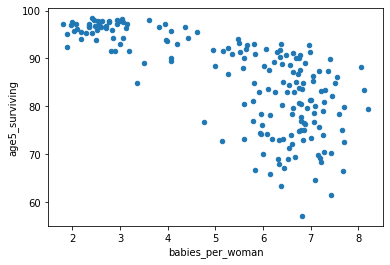

In [7]:
gapminder[gapminder.year == 1965].plot.scatter('babies_per_woman', 'age5_surviving')

In [8]:
# create a function to visualize the same plot for different years

def plotyear(year):
    data = gapminder[gapminder.year == year]
    dotsize = 5e-6 * data.population # make different sized dots based on population size
    colors = data.region.map({'Africa':'blue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})
    
    data.plot.scatter('babies_per_woman', 'age5_surviving', 
                      s=dotsize, c=colors,
                     linewidths=1, edgecolors='k',
                     figsize=(12,9))
    
    pp.axis(ymin=50, ymax=105, xmin=0,xmax=8)
    pp.xlabel('babies per woman')
    pp.ylabel('% surviving by 5')
    
    

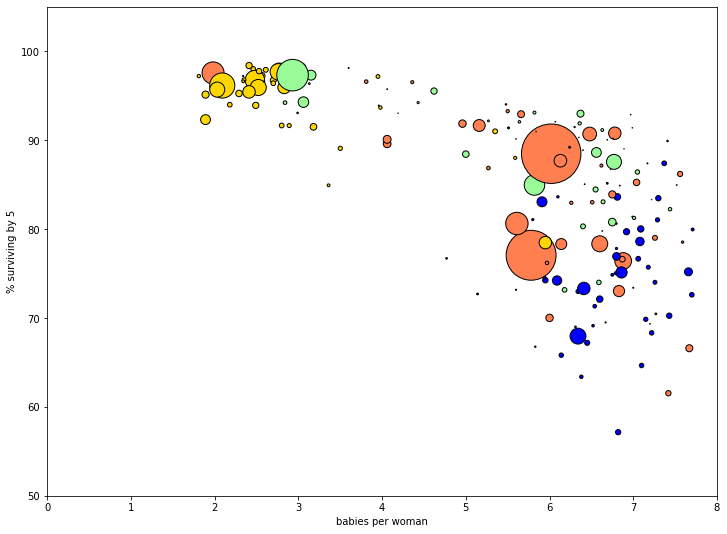

In [9]:
plotyear(1965)

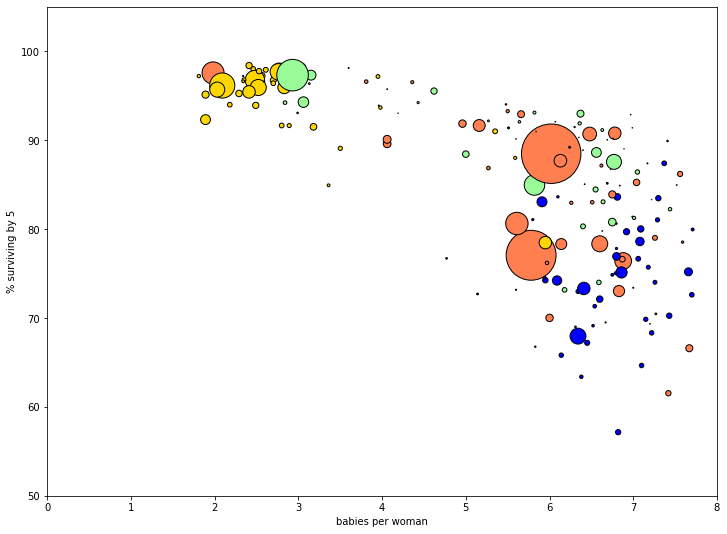

<function __main__.plotyear(year)>

In [10]:
# now we can add interactivity

interact(plotyear, year=widgets.IntSlider(min=1950, max=2015, step=1, value=1965)) #value sets initial value

In [11]:
china1965 = pd.read_csv('Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/income-1965-china.csv')
china2015 = pd.read_csv('Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/income-2015-china.csv')
us1965 = pd.read_csv('Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/income-1965-usa.csv')
us2015 = pd.read_csv('Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/income-2015-usa.csv')

In [13]:
china1965.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   income        1000 non-null   float64
 1   log10_income  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [14]:
china1965.head()

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402


In [15]:
china1965.min()

income          0.041968
log10_income   -1.377078
dtype: float64

In [16]:
china1965.max()

income          5.426802
log10_income    0.734544
dtype: float64

In [19]:
china1965.mean()

income          0.660597
log10_income   -0.274157
dtype: float64

In [21]:
china1965.var(ddof=0)

income          0.208846
log10_income    0.088610
dtype: float64

In [22]:
china1965.quantile([.25,.75])

,income,log10_income
0.25,0.344130,-0.463277
0.75,0.863695,-0.063640


In [24]:
china1965.median()

income          0.557477
log10_income   -0.253773
dtype: float64

In [26]:
# inverse of quantile to find percent
scipy.stats.percentileofscore(china1965.income,1.5) # 95 % fall below

95.5

In [27]:
china1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,0.660597,-0.274157
std,0.457226,0.297822
min,0.041968,-1.377078
25%,0.344130,-0.463277
50%,0.557477,-0.253773
75%,0.863695,-0.063640
max,5.426802,0.734544


In [28]:
us1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,31.587965,1.418835
std,22.101531,0.262200
min,4.177852,0.620953
25%,17.498592,1.243003
50%,26.069531,1.416133
75%,39.017113,1.591255
max,246.030397,2.390989


<AxesSubplot:>

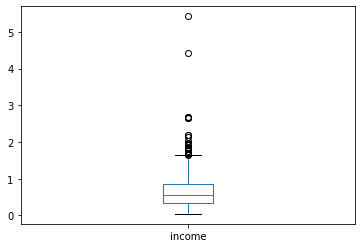

In [29]:
china1965.income.plot(kind='box')

<AxesSubplot:>

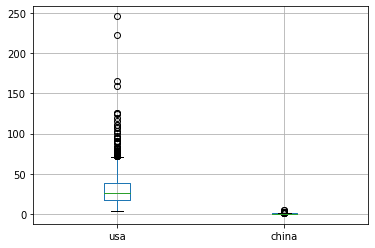

In [31]:
pd.DataFrame({'usa': us1965.income, 'china': china1965.income}).boxplot()

<AxesSubplot:>

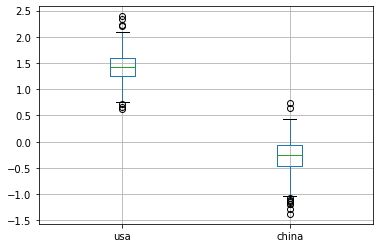

In [32]:
pd.DataFrame({'usa': us1965.log10_income, 'china': china1965.log10_income}).boxplot()

<AxesSubplot:ylabel='Frequency'>

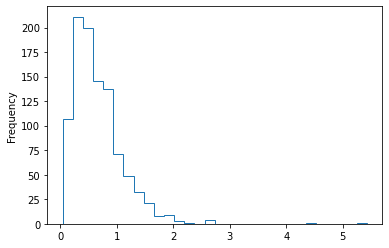

In [33]:
china1965.income.plot(kind='hist',histtype='step', bins=30)

(-0.2272733166444291, 3.0, 0.0, 221.55)

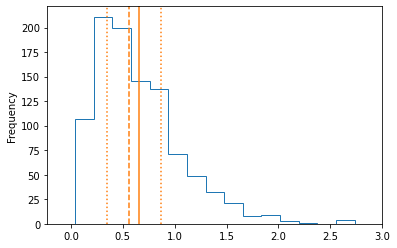

In [35]:
# add lines from matplotlib for statistics
china1965.income.plot(kind='hist',histtype='step', bins=30)

pp.axvline(china1965.income.mean(), c='C1')
pp.axvline(china1965.income.median(), c='C1', linestyle='--')
pp.axvline(china1965.income.quantile(.25), c='C1', linestyle=':')
pp.axvline(china1965.income.quantile(.75), c='C1', linestyle=':')
pp.axis(xmax=3) # zooom in

(0.0, 3.0, 0.0, 1.2342999882944063)

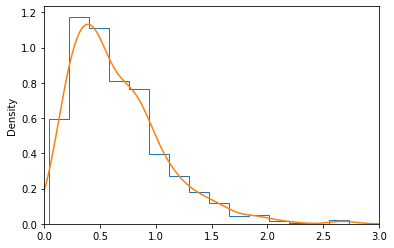

In [38]:
# density plot: approximates continuous line from histogram
china1965.income.plot(kind='hist',histtype='step', bins=30,density=True)
china1965.income.plot.density()
pp.axis(xmin=0,xmax=3)

(0.0, 3.0, 0.0, 1.2342999882944063)

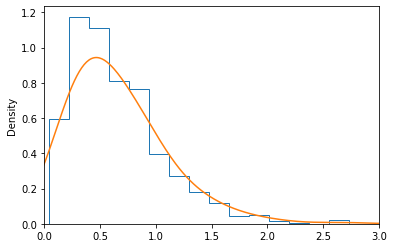

In [39]:
# density plot: approximates continuous line from histogram
china1965.income.plot(kind='hist',histtype='step', bins=30,density=True)
china1965.income.plot.density(bw_method=.5) # bandwidth controls the smoothing factor
pp.axis(xmin=0,xmax=3)

<AxesSubplot:ylabel='Frequency'>

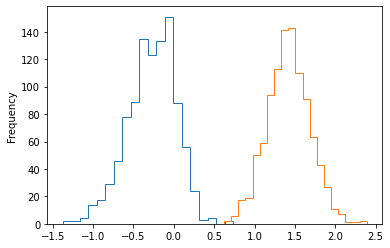

In [41]:
china1965.log10_income.plot.hist(histtype='step', bins=20)
us1965.log10_income.plot.hist(histtype='step', bins=20)

([<matplotlib.axis.XTick at 0x12201ed30>,
 [Text(-0.6020599913279624, 0, '0.25'),
  Text(-0.3010299956639812, 0, '0.5'),
  Text(0.0, 0, '1'),
  Text(0.3010299956639812, 0, '2'),
  Text(0.6020599913279624, 0, '4'),
  Text(0.9030899869919435, 0, '8'),
  Text(1.2041199826559248, 0, '16'),
  Text(1.505149978319906, 0, '32'),
  Text(1.806179973983887, 0, '64')])

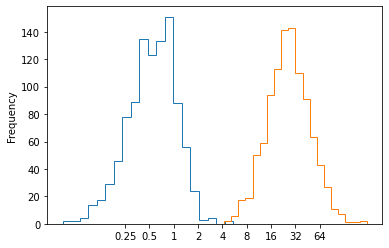

In [45]:
# add tick marks and axis values in dollars
china1965.log10_income.plot.hist(histtype='step', bins=20)
us1965.log10_income.plot.hist(histtype='step', bins=20)

levels=[.25,.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels)

([<matplotlib.axis.XTick at 0x122b22c10>,
 [Text(-0.6020599913279624, 0, '0.25'),
  Text(-0.3010299956639812, 0, '0.5'),
  Text(0.0, 0, '1'),
  Text(0.3010299956639812, 0, '2'),
  Text(0.6020599913279624, 0, '4'),
  Text(0.9030899869919435, 0, '8'),
  Text(1.2041199826559248, 0, '16'),
  Text(1.505149978319906, 0, '32'),
  Text(1.806179973983887, 0, '64')])

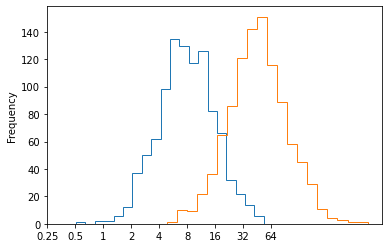

In [46]:
china2015.log10_income.plot.hist(histtype='step', bins=20)
us2015.log10_income.plot.hist(histtype='step', bins=20)

levels=[.25,.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels)

In [47]:
# rescale to show population relative sizes
gaminder=pd.read_csv('Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/gapminder.csv')

In [48]:
gapminder.query('country == "China" and year == 2015')

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
2834,China,2015,Asia,1.376049e+09,76.2,98.93,1.57,13334.0,36.506502


In [49]:
c_pop2015 = float(gapminder.query('country == "China" and year == 2015').population)

In [53]:
gapminder.query('country == "United States" and year == 2015')

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
14091,United States,2015,America,321773631.0,79.1,99.35,1.97,53354.0,146.075291


In [54]:
u_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population)

In [55]:
# create a weighted value over size
china2015['weight'] = c_pop2015/len(china2015)
us2015['weight'] = u_pop2015/len(us2015)


([<matplotlib.axis.XTick at 0x12340a7c0>,
 [Text(-0.6020599913279624, 0, '0.25'),
  Text(-0.3010299956639812, 0, '0.5'),
  Text(0.0, 0, '1'),
  Text(0.3010299956639812, 0, '2'),
  Text(0.6020599913279624, 0, '4'),
  Text(0.9030899869919435, 0, '8'),
  Text(1.2041199826559248, 0, '16'),
  Text(1.505149978319906, 0, '32'),
  Text(1.806179973983887, 0, '64')])

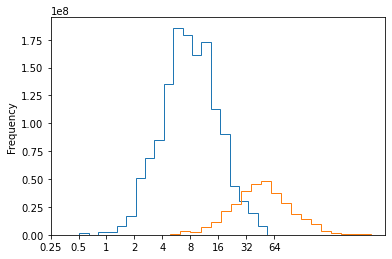

In [57]:
china2015.log10_income.plot.hist(histtype='step', bins=20, weights=china2015.weight)
us2015.log10_income.plot.hist(histtype='step', bins=20, weights=us2015.weight)

levels=[.25,.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels)


In [58]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [60]:
italy = gapminder.query('country == "Italy"')

<AxesSubplot:xlabel='year', ylabel='population'>

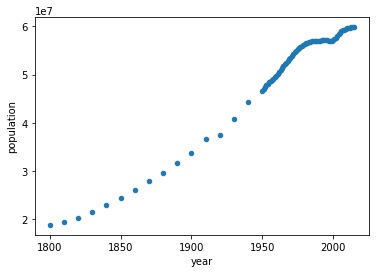

In [61]:
italy.plot.scatter("year", "population")

<AxesSubplot:xlabel='year', ylabel='population'>

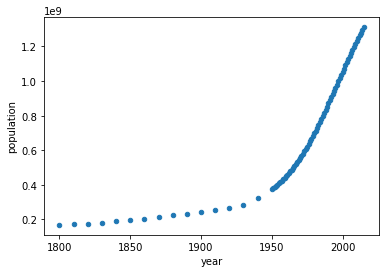

In [62]:
gapminder.query('country == "India"').plot.scatter("year", "population")

<AxesSubplot:xlabel='year', ylabel='gdp_per_day'>

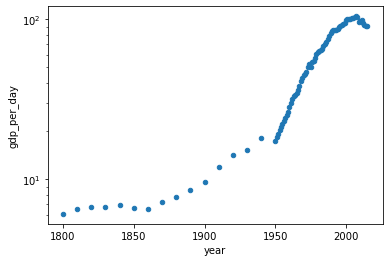

In [63]:
italy.plot.scatter("year", "gdp_per_day", logy=True)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

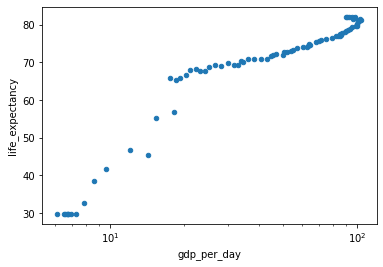

In [64]:
italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

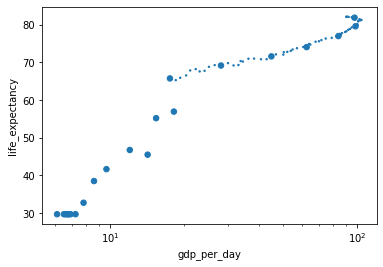

In [65]:
size = np.where(italy.year % 10 == 0,30,2)

italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

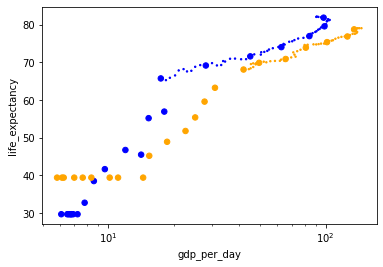

In [71]:
data = gapminder.query('(country == "Italy") or (country == "United States")')

size = np.where(data.year % 10 == 0,30,2) # if 0, 30 otherwize, 2
color = np.where(data.country == "Italy", "blue", 'orange') # if Italy, blue, otherwise, orange

data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

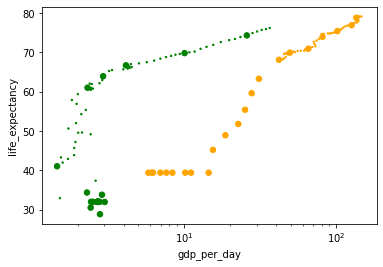

In [72]:
data = gapminder.query('(country == "China") or (country == "United States")')

size = np.where(data.year % 10 == 0,30,2) # if 0, 30 otherwize, 2
color = np.where(data.country == "China", "green", 'orange') # if Italy, blue, otherwise, orange

data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>

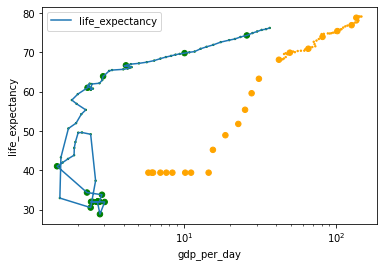

In [73]:
data = gapminder.query('(country == "China") or (country == "United States")')

size = np.where(data.year % 10 == 0,30,2) # if 0, 30 otherwize, 2
color = np.where(data.country == "China", "green", 'orange') # if Italy, blue, otherwise, orange

# use matplotlib trick of saving the plot and adding as axis to the line plot
ax = data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

# use numpy indexing style
data[data.country=='China'].plot.line(x='gdp_per_day', y = 'life_expectancy', ax=ax)

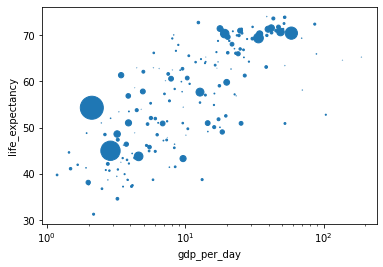

In [79]:
# make a function we will keep changing to add feature

def plotyear(year):
    data = gapminder[gapminder.year == year]
    area = data.population * .75e-6
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=area)
    
plotyear(1965)

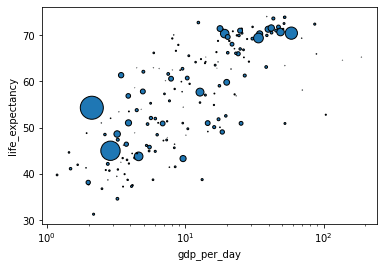

In [80]:
# make a function we will keep changing to add feature

def plotyear(year):
    data = gapminder[gapminder.year == year]
    area = data.population * .75e-6
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, 
                      s=area, linewidths=1, edgecolors='black')
    
plotyear(1965)

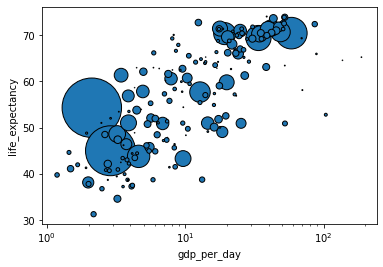

In [82]:
# make the dot size bigger but sort so large dots are in back

def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = data.population * 5e-6
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, 
                      s=area, linewidths=1, edgecolors='black')
    
plotyear(1965)

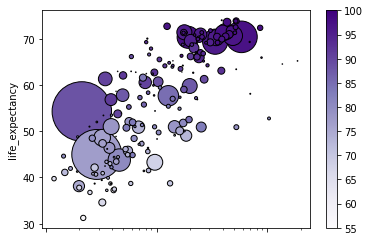

In [85]:
# use color to encode child mortaility.

def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = data.population * 5e-6
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, 
                      s=area, linewidths=1, edgecolors='black',
                     c=color, colormap=matplotlib.cm.get_cmap('Purples'), vmin=55, vmax=100)
    
plotyear(1965)

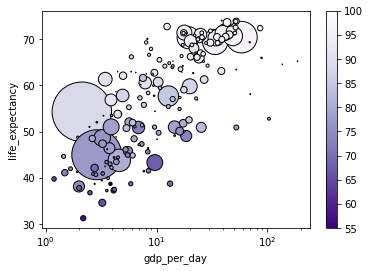

In [86]:
# make so that the purples go light to dark (more kids dying = darker color) and show the x axis still

def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = data.population * 5e-6
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, 
                      s=area, linewidths=1, edgecolors='black',
                     c=color, 
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                     sharex=False)
    
plotyear(1965)

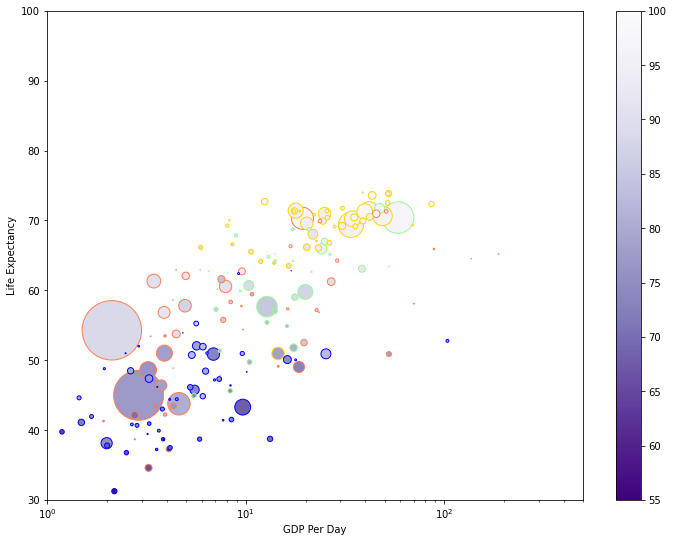

In [90]:
# Color border of dots based on region

def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = data.population * 5e-6
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'blue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, 
                      s=area, linewidths=1, edgecolors=edgecolor,
                     c=color, 
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                     sharex=False,
                     figsize=(12,9))
    
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
    pp.xlabel('GDP Per Day')
    pp.ylabel("Life Expectancy")
    
plotyear(1965)

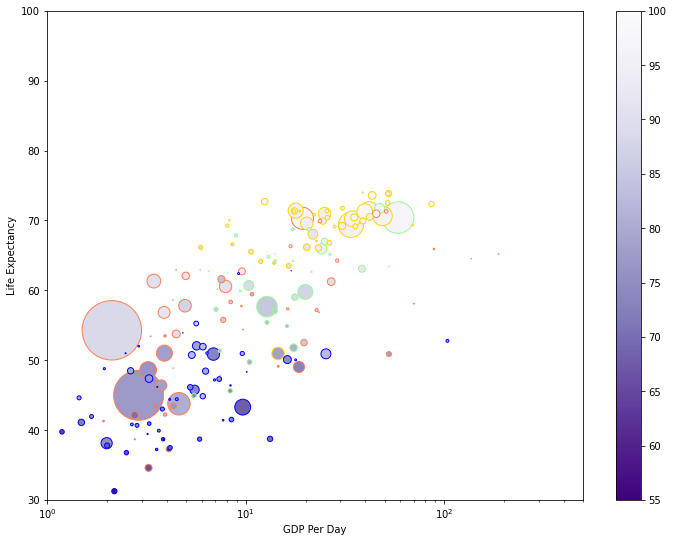

<function __main__.plotyear(year)>

In [91]:
interact(plotyear, year=range(1965,2016,10))

In [92]:
gapminder[gapminder.year==2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

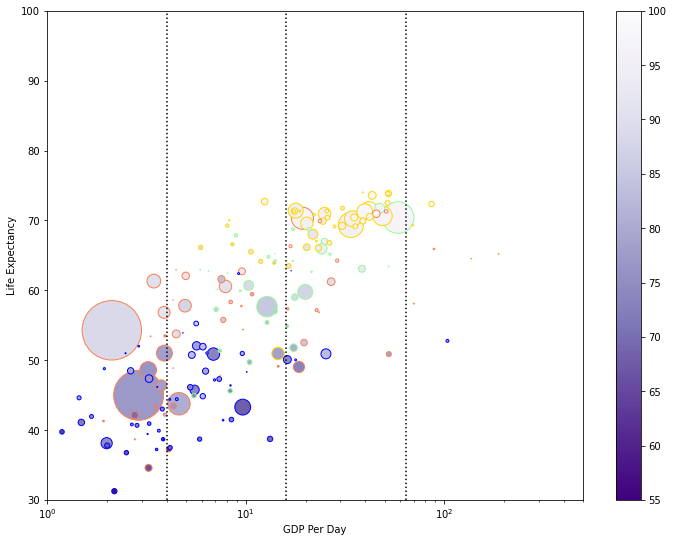

In [94]:
# add bars dividing up 4, 16, and 64 dollars

def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = data.population * 5e-6
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'blue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, 
                      s=area, linewidths=1, edgecolors=edgecolor,
                     c=color, 
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                     sharex=False,
                     figsize=(12,9))
    for level in [4,16,64]:
        pp.axvline(level,linestyle=':', color='k')
        
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
    pp.xlabel('GDP Per Day')
    pp.ylabel("Life Expectancy")
    
plotyear(1965)

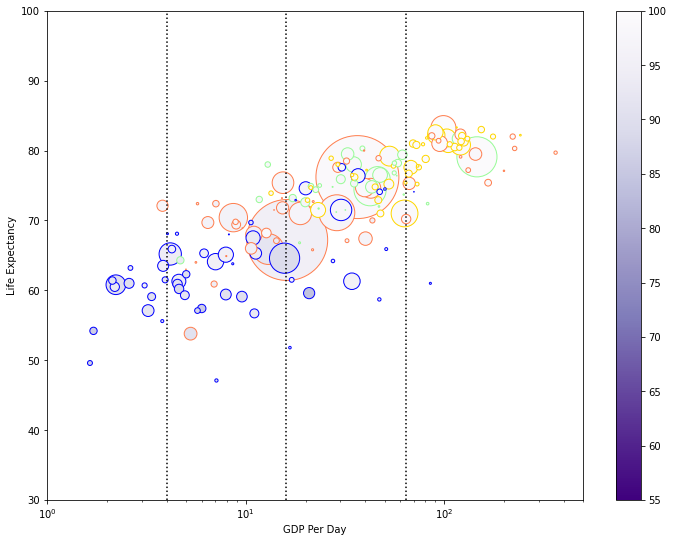

In [95]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = data.population * 5e-6
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'blue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, 
                      s=area, linewidths=1, edgecolors=edgecolor,
                     c=color, 
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                     sharex=False,
                     figsize=(12,9))
    for level in [4,16,64]:
        pp.axvline(level,linestyle=':', color='k')
        
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
    pp.xlabel('GDP Per Day')
    pp.ylabel("Life Expectancy")
    
plotyear(2015)

array([[<AxesSubplot:xlabel='gdp_per_day', ylabel='gdp_per_day'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='gdp_per_day'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='gdp_per_day'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='gdp_per_day'>],
       [<AxesSubplot:xlabel='gdp_per_day', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='life_expectancy'>],
       [<AxesSubplot:xlabel='gdp_per_day', ylabel='age5_surviving'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='age5_surviving'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='age5_surviving'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='age5_surviving'>],
       [<AxesSubplot:xlabel='gdp_per_day', ylabel='babies_per_woman'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='babies_per_woma

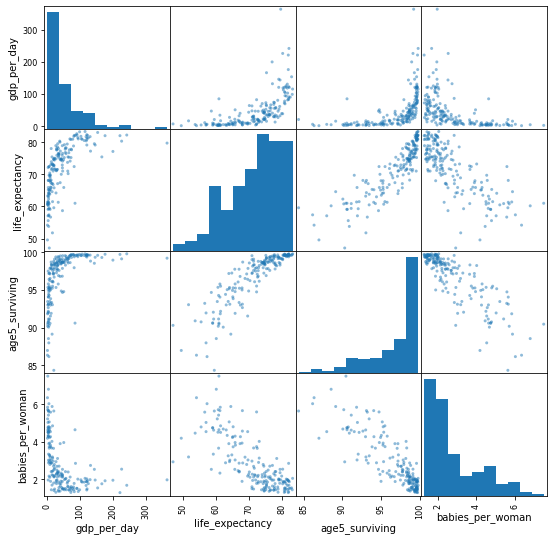

In [98]:
data = gapminder.loc[gapminder.year == 2015, ['gdp_per_day', 'life_expectancy', 'age5_surviving', 'babies_per_woman']]
pd.plotting.scatter_matrix(data, figsize=(9,9))

## Tables and Categorical Variables

David Kaplan dataset


In [101]:
smoking = pd.read_csv('Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_06/whickham.csv')

In [102]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB
